In [2]:
import pandas as pd 
import geopandas as gpd
import numpy as np 
from shapely.geometry import Polygon,Point,box 
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt

def generate_grid_polygons(distance_deg, maxx, minx, miny, maxy):
    polygons = []
    height = maxy - miny
    length = maxx - minx
    # Calculate the number of points in x and y directions
    num_points_x = int(length / distance_deg)
    num_points_y = int(height / distance_deg)

    # Starting coordinates
    start_lat = miny
    start_lon = minx

    for j in range(num_points_y):
        for i in range(num_points_x):
            lat = start_lat + j * distance_deg
            lon = start_lon + i * distance_deg

            # Ensure the new point is within the boundary of Nepal
            if miny <= lat <= maxy and minx <= lon <= maxx:
                # Create a rectangle around the centroid
                polygon = [lat, lon]
                polygons.append(polygon)
    return polygons

csv_file_path = "new_rainfall.csv"
df = pd.read_csv(csv_file_path)
longitude = df['longitude'][0]
latitude = df['latitude']
value = df['value']
print(type(df['value'][0]))
print(df)
grid_size = 0.1

nepal_file_path = "shpfiles/"
nepal_boundary = gpd.read_file(nepal_file_path)
print(nepal_boundary.total_bounds)
minx,miny,maxx,maxy = nepal_boundary.total_bounds

coordinates = generate_grid_polygons(grid_size, maxx, minx, miny, maxy)
lat = [coord[0] for coord in coordinates]
lon = [coord[1] for coord in coordinates]

points = np.column_stack((lon, lat))
polygons = [
   box(x, y, x + grid_size, y + grid_size) for x, y in points
]





OK = OrdinaryKriging(longitude, latitude, value, variogram_model="exponential")
interp_temps, _ = OK.execute("points", lon, lat)
print(interp_temps)
precipitation_gdf = gpd.GeoDataFrame(
        geometry=polygons, data={"interpolated_value": interp_temps}
    )
precipitation_gdf.crs = "EPSG:4326"
if nepal_boundary.crs != precipitation_gdf.crs:
        precipitation_gdf = precipitation_gdf.to_crs(nepal_boundary.crs)
clipped_heatmap = gpd.overlay(
    precipitation_gdf, nepal_boundary, how="intersection", keep_geom_type=False
)
# Display the raster data using Matplotlib
print(clipped_heatmap)
cmap='jet'
clipped_heatmap.plot(column='interpolated_value', cmap=cmap, marker='o', markersize=10, legend=True)
plt.title('Stations in Nepal')
plt.savefig('nepal_station.png')
plt.show()




<class 'numpy.float64'>
     Unnamed: 0  station  parameter                       time  value  \
0             0      328          1  2011-06-01 03:00:00+00:00   20.0   
1             1      373          1  2011-06-01 03:00:00+00:00   20.0   
2             2      471          1  2011-06-01 03:00:00+00:00   20.5   
3             3      434          1  2011-06-01 03:00:00+00:00    1.8   
4             4      374          1  2011-06-01 03:00:00+00:00   22.2   
..          ...      ...        ...                        ...    ...   
367         367      433          1  2011-06-01 03:00:00+00:00   29.0   
368         368      429          1  2011-06-01 03:00:00+00:00   29.5   
369         369      504          1  2011-06-01 03:00:00+00:00    3.5   
370         370      321          1  2011-06-01 03:00:00+00:00  120.2   
371         371      469          1  2011-06-01 03:00:00+00:00    7.0   

                             station__location  station__elevation  longitude  \
0    SRID=4326;POI

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 372

In [2]:
print(len(longitude.values),len(latitude.values),len(value.values))
print(len(lon),len(lat))
print(interp_temps)
print(OK.semivariance)


AttributeError: 'numpy.float64' object has no attribute 'values'

hello
Index(['Unnamed: 0', 'station', 'parameter', 'time', 'value',
       'station__location', 'station__elevation', 'longitude', 'latitude'],
      dtype='object')
3444
3444
3444
      interpolated_value                                           geometry
0              27.164857  POLYGON ((80.16015 26.34742, 80.16015 26.44742...
1              27.127423  POLYGON ((80.26015 26.34742, 80.26015 26.44742...
2              27.087512  POLYGON ((80.36015 26.34742, 80.36015 26.44742...
3              27.045192  POLYGON ((80.46015 26.34742, 80.46015 26.44742...
4              27.000585  POLYGON ((80.56015 26.34742, 80.56015 26.44742...
...                  ...                                                ...
3439           27.048518  POLYGON ((87.86015 30.44742, 87.86015 30.54742...
3440           27.095920  POLYGON ((87.96015 30.44742, 87.96015 30.54742...
3441           27.141473  POLYGON ((88.06015 30.44742, 88.06015 30.54742...
3442           27.185047  POLYGON ((88.16015 30.44742, 88.1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11056\240842012.py:55: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...

  clipped_heatmap = gpd.overlay(grid_gdf, nepal_boundary, how='intersection', keep_geom_type=False)


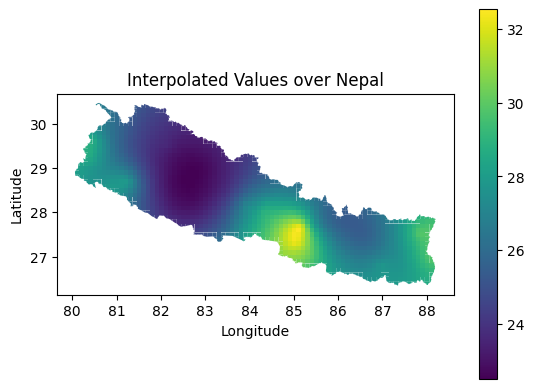

In [3]:
import geopandas as gpd
import numpy as np
from shapely.geometry import box
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt

# Assuming you have a GeoDataFrame for Nepal, let's call it 'nepal_boundary'
nepal_file_path = "shpfiles/"
nepal_boundary = gpd.read_file(nepal_file_path)

# Define the bounding box of Nepal
minx, miny, maxx, maxy = nepal_boundary.total_bounds

# Create a regular grid of 20x20 km cells within the bounding box
grid_size = .1
print('hello')# in kilometers
grid_lon = np.arange(minx, maxx, grid_size)
grid_lat = np.arange(miny, maxy, grid_size)

lon, lat = np.meshgrid(grid_lon, grid_lat)

# Use column_stack to combine the matrices into a single array of points
points = np.column_stack((lon.ravel(), lat.ravel()))



station_df = pd.read_csv('new_rainfall.csv')
df['value'] = df['value'].replace(20,0)
print(station_df.columns)
# Sample data: replace with your observed data
observed_data = pd.DataFrame({
    'longitude': station_df['longitude'],
    'latitude': station_df['latitude'],
    'value': station_df['value']
})

print(len(grid_lon)*len(grid_lat))
# Perform Ordinary Kriging for interpolation
OK = OrdinaryKriging(
    observed_data['longitude'],
    observed_data['latitude'],
    observed_data['value'],
    variogram_model='exponential'
)
interp_values, _ = OK.execute('grid', grid_lon, grid_lat)

print(len(interp_values.flatten()))
# Create GeoDataFrame with grid polygons and interpolated values
grid_cells = [box(x, y, x + grid_size, y + grid_size) for x, y in points]
print(len(grid_cells))
grid_gdf = gpd.GeoDataFrame(geometry=grid_cells, data={'interpolated_value': interp_values.flatten()})
print(grid_gdf)

# Overlay with Nepal boundary
clipped_heatmap = gpd.overlay(grid_gdf, nepal_boundary, how='intersection', keep_geom_type=False)

# Plot the results
cmap = 'viridis'
clipped_heatmap.plot(column='interpolated_value', cmap=cmap, edgecolor='black', linewidth=0, legend=True)
plt.title('Interpolated Values over Nepal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('precipiation_daily_10')
plt.show()

hello
Index(['Unnamed: 0', 'station', 'parameter', 'time', 'value',
       'station__location', 'station__elevation', 'longitude', 'latitude'],
      dtype='object')
3321
[nan nan nan ... nan nan nan]
3321
nan
--
3321


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11056\1431322515.py:50: RuntimeWarning: invalid value encountered in floor_divide
  elevation_effect = (grid_ele-min(observed_data['elevation']))//153


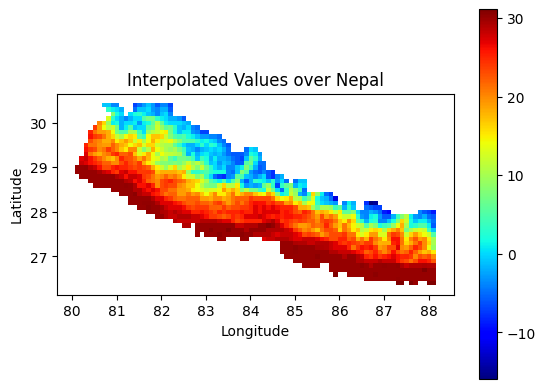

In [5]:
import geopandas as gpd
import numpy as np
from shapely.geometry import box
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt

# Assuming you have a GeoDataFrame for Nepal, let's call it 'nepal_boundary'
nepal_file_path = "shpfiles/"
nepal_boundary = gpd.read_file(nepal_file_path)

# Define the bounding box of Nepal
minx, miny, maxx, maxy = nepal_boundary.total_bounds

# Create a regular grid of 20x20 km cells within the bounding box
grid_size = .10
elevation_file_path = 'elevation_data_10.csv'
elevation_df = pd.read_csv(elevation_file_path)
print('hello')# in kilometers
grid_lon = sorted(set(elevation_df['Longitude'].values)) 
grid_lat = sorted(set(elevation_df['Latitude'].values))
grid_ele = elevation_df['Elevation'].replace(0,np.inf).values 

lon, lat = np.meshgrid(grid_lon, grid_lat)

# Use column_stack to combine the matrices into a single array of points
points = np.column_stack((lon.ravel(), lat.ravel()))



station_df = pd.read_csv('max_tem.csv')
print(station_df.columns)
# Sample data: replace with your observed data
observed_data = pd.DataFrame({
    'longitude': station_df['longitude'],
    'latitude': station_df['latitude'],
    'elevation':station_df['station__elevation'],
    'value': station_df['value']
})

print(len(grid_lon)*len(grid_lat))
# Perform Ordinary Kriging for interpolation
OK = OrdinaryKriging(
    observed_data['longitude'],
    observed_data['latitude'],
    observed_data['value'],
    variogram_model='exponential'
)
interp_values, _ = OK.execute('grid', grid_lon, grid_lat)

elevation_effect = (grid_ele-min(observed_data['elevation']))//153
print(elevation_effect)
print(len(interp_values.flatten()))
interp_values = interp_values.flatten() - elevation_effect 
print(min(interp_values))
                                 

print(np.std(interp_values.flatten()))
# Create GeoDataFrame with grid polygons and interpolated values
grid_cells = [box(x, y, x + grid_size, y + grid_size) for x, y in points]
print(len(grid_cells))
grid_gdf = gpd.GeoDataFrame(geometry=grid_cells, data={'interpolated_value': interp_values})

# Plot the results
cmap = 'jet'
grid_gdf.plot(column='interpolated_value', cmap=cmap, edgecolor='black', linewidth=0, legend=True)
plt.title('Interpolated Values over Nepal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

hello
37127
37127
37127
       interpolated_value                                           geometry
0                     NaN  POLYGON ((80.10515 26.36242, 80.10515 26.39242...
1                     NaN  POLYGON ((80.13515 26.36242, 80.13515 26.39242...
2                     NaN  POLYGON ((80.16515 26.36242, 80.16515 26.39242...
3                     NaN  POLYGON ((80.19515 26.36242, 80.19515 26.39242...
4                     NaN  POLYGON ((80.22515 26.36242, 80.22515 26.39242...
...                   ...                                                ...
37122                 NaN  POLYGON ((88.08515 30.44242, 88.08515 30.47242...
37123                 NaN  POLYGON ((88.11515 30.44242, 88.11515 30.47242...
37124                 NaN  POLYGON ((88.14515 30.44242, 88.14515 30.47242...
37125                 NaN  POLYGON ((88.17515 30.44242, 88.17515 30.47242...
37126                 NaN  POLYGON ((88.20515 30.44242, 88.20515 30.47242...

[37127 rows x 2 columns]
[[    0     0     0 ...   

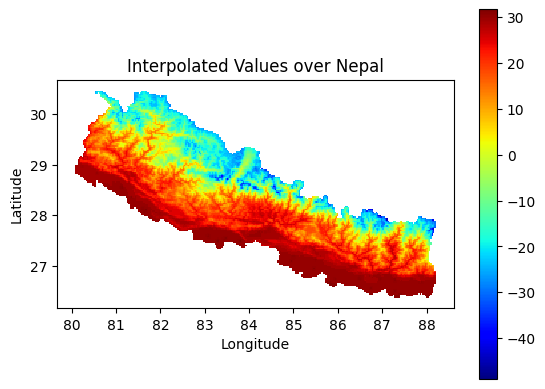

In [3]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import box
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt

# Assuming you have a GeoDataFrame for Nepal, let's call it 'nepal_boundary'
nepal_file_path = "shpfiles/"
nepal_boundary = gpd.read_file(nepal_file_path)

# Define the bounding box of Nepal
minx, miny, maxx, maxy = nepal_boundary.total_bounds

# Create a regular grid of 20x20 km cells within the bounding box
grid_size = .03
elevation_file_path = 'elevation_data_3.csv'
elevation_df = pd.read_csv(elevation_file_path)
print('hello')# in kilometers
grid_lon = sorted(set(elevation_df['Longitude'].values)) 
grid_lat = sorted(set(elevation_df['Latitude'].values))
grid_ele = elevation_df['Elevation'].replace(0,np.nan).values

lon, lat = np.meshgrid(grid_lon, grid_lat)

# Use column_stack to combine the matrices into a single array of points
points = np.column_stack((lon.ravel(), lat.ravel()))



station_df = pd.read_csv('max_tem.csv')
# Sample data: replace with your observed data
observed_data = pd.DataFrame({
    'longitude': station_df['longitude'],
    'latitude': station_df['latitude'],
    'elevation':station_df['station__elevation'],
    'value': station_df['value']
})

print(len(grid_lon)*len(grid_lat))
# Perform Ordinary Kriging for interpolation
OK = OrdinaryKriging(
    observed_data['longitude'],
    observed_data['latitude'],
    observed_data['value'],
    variogram_model='exponential'
)
interp_values, _ = OK.execute('grid', grid_lon, grid_lat)



# Create elevation_effect array with the original calculation
elevation_effect = (grid_ele - min(observed_data['elevation'])) // 100
print(len(interp_values.flatten()))
interp_values = interp_values.flatten() - elevation_effect 
no_none = [value for value in interp_values if not np.isnan(value)]
# Create GeoDataFrame with grid polygons and interpolated values
grid_cells = [box(x, y, x + grid_size, y + grid_size) for x, y in points]
print(len(grid_cells))
grid_gdf = gpd.GeoDataFrame(geometry=grid_cells, data={'interpolated_value': interp_values})
print(grid_gdf)
grid_gdf.crs = "EPSG:4326"  # Set CRS for heatmap_df, assuming WGS84

    # Reproject both GeoDataFrames to a common CRS if necessary
if nepal_boundary.crs != grid_gdf.crs:
    grid_gdf = grid_gdf.to_crs(nepal_boundary.crs)

# Clip the heatmap to the Nepal boundary
sindex2 = grid_gdf.sindex
possible_matches_index = grid_gdf.sindex.query(nepal_boundary.geometry,predicate="intersects")
print(possible_matches_index)

# Filter potential matches from gdf1
final_result = grid_gdf.iloc[possible_matches_index[1,:]].copy()


# Plot the results
cmap = 'jet'
grid_gdf.plot(column='interpolated_value', cmap=cmap, edgecolor='black', linewidth=0, legend=True)
plt.title('Interpolated Values over Nepal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('3_grid.png')
plt.show()